# Task 2 - To Explore Supervised Machine Learning

Problem Statement - To predict the percentage of marks a student will score after given the number of hours they have studied.  
                    Also as a test case, to predict the marks if number of hours is given to be 9.25 hours.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import pickle

### Reading Dataset

In [2]:
df = pd.read_csv("http://bit.ly/w-data")
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Data Preprocessing

In [3]:
#Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
#Checking for null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Exploring Dataset

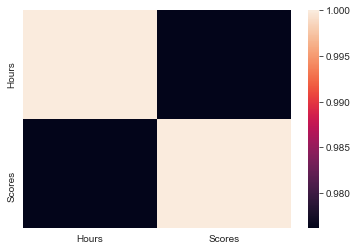

In [6]:
sns.heatmap(df.corr())

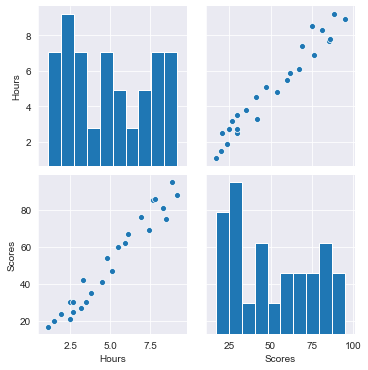

In [7]:
sns.pairplot(data=df)

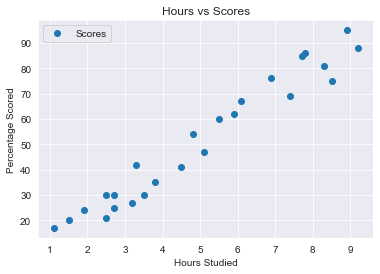

In [8]:
df.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored') 
plt.show()

### Defining Input and Target values

In [9]:
X = df.drop('Scores',axis=1)
y = df['Scores']


### Training the model

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0) 

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
pickle.dump(lr,open('model.pkl','wb'))     #Saving the training model using pickle library

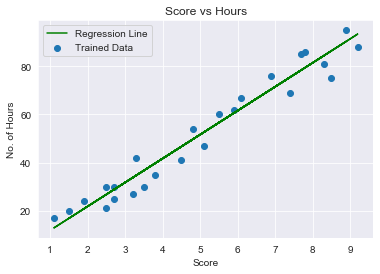

In [12]:
# Plotting the regression line
line = lr.coef_*X+lr.intercept_

# Plotting for the test data
plt.scatter(X, y,label='Trained Data')
plt.plot(X, line, color='g',label='Regression Line')
plt.xlabel('Score')
plt.ylabel('No. of Hours')
plt.title('Score vs Hours')
plt.legend()
plt.show()

### Testing the Model

In [13]:
lr = pickle.load(open('model.pkl','rb'))     #Loading the saved model
pred = lr.predict(X_test)

In [14]:
# Test with our own data
hours = 9.25
own_pred = lr.predict(np.array(hours).reshape(-1,1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0].round(3)))

No of Hours = 9.25
Predicted Score = 93.893


### Comparing with actual values

In [15]:
comp = pd.DataFrame({'Actual':y_test, 'Predicted':pred}) 
comp.reset_index(drop=True,inplace=True)
comp['Deviation'] = abs(comp['Actual']-comp['Predicted'])
comp

,Actual,Predicted,Deviation
0,20,16.844722,3.155278
1,27,33.745575,6.745575
2,69,75.500624,6.500624
3,30,26.786400,3.213600
4,62,60.588106,1.411894
5,35,39.710582,4.710582
6,24,20.821393,3.178607


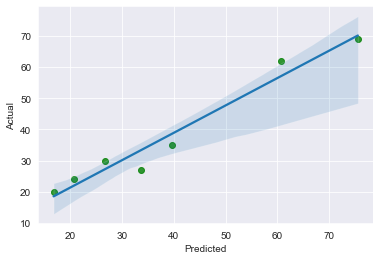

In [16]:
#Deviation
sns.regplot('Predicted','Actual',data=comp,scatter_kws={'color':'green'})

### Evaluating the Model

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('Mean Absolute Error:', mean_absolute_error(y_test, pred).round(3)) 
print('Mean Squared Error:', mean_squared_error(y_test,pred).round(3))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)).round(3))

Mean Absolute Error: 4.131
Mean Squared Error: 20.333
Root Mean Squared Error: 4.509
